<a href="https://colab.research.google.com/github/dvschultz/stylegan2-ada-pytorch/blob/main/StyleCLIP_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-Guided Editing of Images (Using CLIP and StyleGAN)

In [ ]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-48244a3f-0992-e494-379d-4ed9a74f27b9)


In [ ]:
# title Setup (may take a few minutes)
!git clone https://github.com/dvschultz/StyleCLIP.git

!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

%cd /content/StyleCLIP/

Cloning into 'StyleCLIP'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 553 (delta 28), reused 83 (delta 26), pack-reused 461
Receiving objects: 100% (553/553), 163.08 MiB | 24.83 MiB/s, done.
Resolving deltas: 100% (164/164), done.
     |████████████████████████████████| 71kB 6.4MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-cp37-none-any.whl size=41935 sha256=85642c0925bf771c0c8a9810b568eaad2eaed38e0f97f4e2fdb962922a835666
  Stored in directory: /root/.cache/pip/wheels/99/2c/e6/109c8a28fef7a443f67ba58df21fe1d0067ac3322e75e6b0b7
Successfully built ftfy
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-5hfifc74
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-5hfifc74
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 12.8MB 11.7MB/s 
  Created wheel for clip: filename=clip-1.0-cp3

This model requires a model file in the Rosinality format. If you have an NVIDIA official model (or one for my repo) you can convert it to the Rosinality format using [this notebook](https://colab.research.google.com/github/dvschultz/stylegan2-ada-pytorch/blob/main/SG2_ADA_PT_to_Rosinality.ipynb)

Once the model is converted you can either sync your Drive or use gdown to bring the model here.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#download file and keep its name
!gdown --id [id of file]

#optional: change the name of the file when it downloads
!gdown --id [id of file] -O /path/filename.ext

`Edit` will start with an image of your choice (upload a `.npz` file and set the path under `latent_path`), `free_generation` will start with a random image. 

In [ ]:
experiment_type = 'free_generation' #@param ['edit', 'free_generation']

model_path = '/content/ladiesblack.pt' #@param {type:"string"}

description = 'A high quality image of red flowers on a black background' #@param {type:"string"}

latent_path = None #@param {type:"string"}

optimization_steps = 25 #@param {type:"number"}

l2_lambda = 0.008 #@param {type:"number"}

create_video = True #@param {type:"boolean"}

You likely don’t need to set anything else in th cell below, but you might want to edit the learning rate (`"lr"`) to see how it affects image optimization.

In [ ]:
# title Additional Arguments
args = {
    "description": description,
    "ckpt": model_path,
    "stylegan_size": 1024,
    "lr_rampup": 0.05,
    "lr": 0.1, #default 0.1
    "step": optimization_steps,
    "mode": experiment_type,
    "l2_lambda": l2_lambda,
    "latent_path": latent_path,
    "truncation": 0.5,
    "save_intermediate_image_every": 1 if create_video else 20,
    "results_dir": "results",
    "save_vector": True
}

In [ ]:
%cd /content/StyleCLIP/

from optimization.run_optimization import main
from argparse import Namespace
result = main(Namespace(**args))

/content/StyleCLIP


loss: 0.5840;: 100%|██████████| 25/25 [00:27<00:00,  1.11s/it]


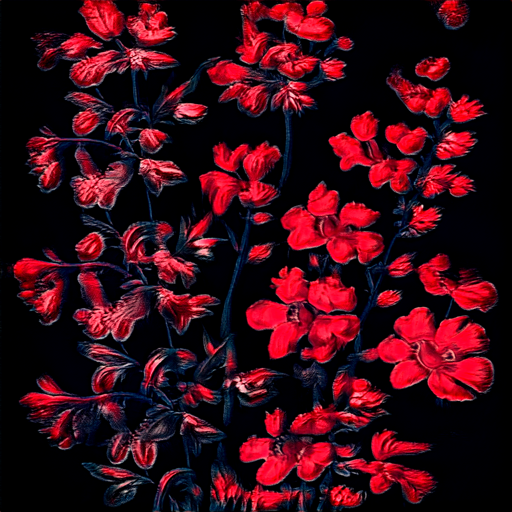

In [ ]:
#@title Visualize Result
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
result_image = ToPILImage()(make_grid(result.detach().cpu(), normalize=True, scale_each=True, range=(-1, 1), padding=0))
h, w = result_image.size
result_image.resize((h // 2, w // 2))

In [ ]:
#@title Create and Download Video

!ffmpeg -r 15 -i results/%05d.png -c:v libx264 -vf fps=25 -pix_fmt yuv420p out.mp4
from google.colab import files
files.download('out.mp4')

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ignore

In [ ]:
#%cd "/content/drive/My Drive/colab-sg2-ada-pytorch/stylegan2-ada-pytorch"
!git config --global user.name "test"
!git config --global user.email "test@test.com"
!git fetch origin
!git stash
!git checkout origin/main -- /content/StyleCLIP/optimization/run_optimization.py

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/dvschultz/StyleCLIP
   0d17712..c22a509  main       -> origin/main
No local changes to save
